# test that FKM works and im not silly

In [28]:
import numpy as np

a = 3
c = 1

def f(x):
    return c * (x - a) ** 2

def d_f(x):
    return 2 * c * (x - a)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 325079.37it/s]


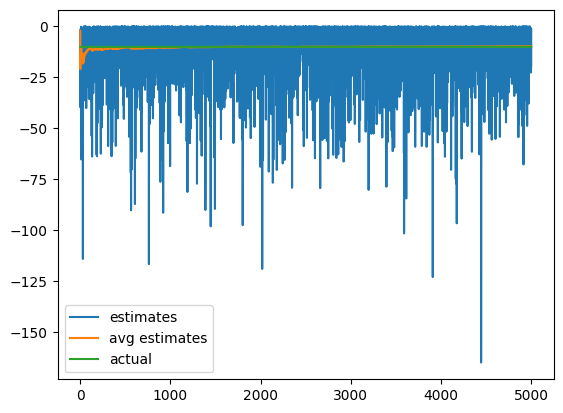

-10
-2.1656275059673367 -10.460191004031463 -9.984618980763113 -10.00470881460546 -9.843044281118233 -9.736823575275533


In [42]:
import matplotlib.pyplot as plt
import tqdm

x = -2
initial_scale = 0.9
T = 5000

estimates = []
actual = d_f(x)

for t in tqdm.trange(1, T + 1):
    scale = initial_scale / t ** 0.25
    noise = np.random.randn()
    grad = (f(x + noise * scale) - f(x)) * noise / scale
    estimates.append(grad)
avg_estimates = np.cumsum(estimates) / np.arange(1, T + 1)
plt.plot(range(T), estimates, label='estimates')
plt.plot(range(T), avg_estimates, label='avg estimates')
plt.plot(range(T), [actual for _ in range(T)], label='actual')
plt.legend()
plt.show()
print(actual)
print(*[avg_estimates[min(j * 1000, len(avg_estimates) - 1)] for j in range(len(avg_estimates) // 1000 + 1)])

# test that sys id works and im not silly

In [15]:
import numpy as np

delta = 0.
d = 9

A = 1 - delta
B = np.random.randn(d)

print('B = {}'.format(B))

def perturbation(t):
#     return 50 * np.sin(t)
    return np.random.randn()

def dynamics(state, control, t):
    return A * state + np.dot(B, control) + perturbation(t)

B = [-1.36687292  0.80621102  0.67607062  0.26855785 -0.70577285 -0.9346887
 -0.93421045  0.44094614  1.13392471]


In [16]:
T = 100000
prev_state = 0.
state = 0.  # x_0
scale = 2 # sigma

u = np.random.randn(d)
B_estimate = np.ones(d)

for t in range(1, T + 1):
    r = np.random.randn(d)
    control = u + scale * r
    state = dynamics(state, control, t)
    
    b_momentum = 1 - 1 / t
    B_estimate = b_momentum * B_estimate + (1 - b_momentum) * r * (state - prev_state) / scale
    
    prev_state = state
print(B_estimate)

[-1.37737397  0.81534405  0.6629152   0.26808228 -0.69609782 -0.93783003
 -0.90902589  0.43650577  1.12841694]


# jax testing

In [146]:
import jax.numpy as jnp
import numpy as np
from jax import jit, grad

d = 1000
h = 500
M = np.random.randn(h + 1, d)
w = np.random.randn(h)

from time import perf_counter

s = perf_counter()
u1 = M[-1] + M[:-1].T @ w
print(perf_counter() - s); s = perf_counter()

u2 = M[-1]
for i in range(h):
    u2 += M[i] * w[i]
print(perf_counter() - s); s = perf_counter()

assert np.allclose(u1, u2)


0.0003263340040575713
0.001686667004832998
